# video with trakbar

In [ ]:
import cv2
import numpy as np

In [ ]:
def nothing(x):
    pass

In [ ]:
cv2.namedWindow('image')
cv2.createTrackbar('hue','iamage',0,360,nothing)

cap = cv2.VideoCapture('tracking1.avi')

In [ ]:
while(cap.isOpened()):
    hue = cv2.getTrackbarPos('hue', 'image')
    
    ret, frame = cap.read()

    if ret :
        #gray = cv2.cvtColor(fram, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            
        # define range of yellow color in HSV
        lower_blue = np.array([hue-50,0,0])
        upper_blue = np.array([hue+50,100,100])
        
        # Threshold the HSV image to get only yellow colors
        mask = cv2.inRange(hsv, lower_blue, upper_blue)

        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame,frame, mask= mask)
        msg = "hue:" + str(hue)
        cv2.putText(frame, msg, (1,30), font, 0.6, (255,255,255),1,cv.LINE_AA)
        cv2.imshow('image',frame)
        cv2.imshow('mask',mask)
        cv2.imshow('res',res)
    
    k = cv2.waitKey(100) & 0xFF
    
    if k == 27:
        break

In [ ]:
cv2.destroyAllWindows()

#  Image Thresholding

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [57]:
img = cv2.imread('img1.jpg',0)

In [58]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

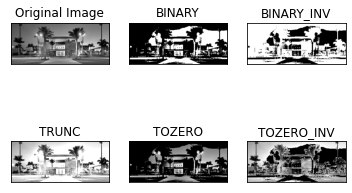

In [59]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [52]:
img = cv2.imread('img1.jpg',0)

In [53]:
h,w=256,512

gray=np.zeros((h,w),np.uint8)

for i in range(h):
    for j in range(w):
        gray[i,j] =(i*j)%256

In [54]:
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

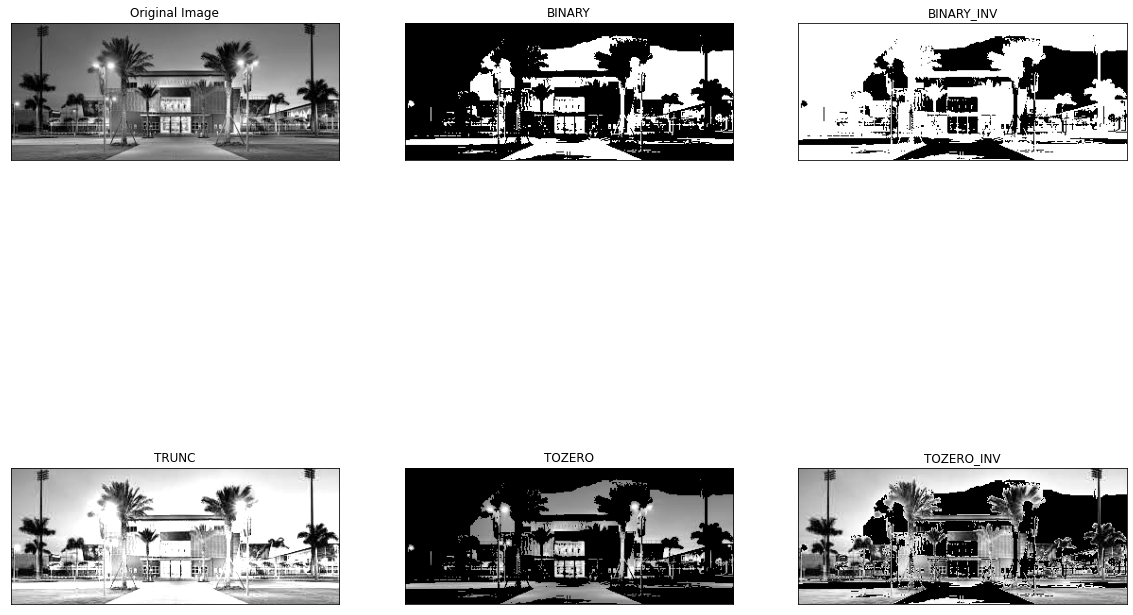

In [55]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(20,15))

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# adaptive thresholding

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [49]:
img = cv2.imread('sIMG_2177.jpg',0) # 2168, 2177, 2180
img = cv2.medianBlur(img,5)

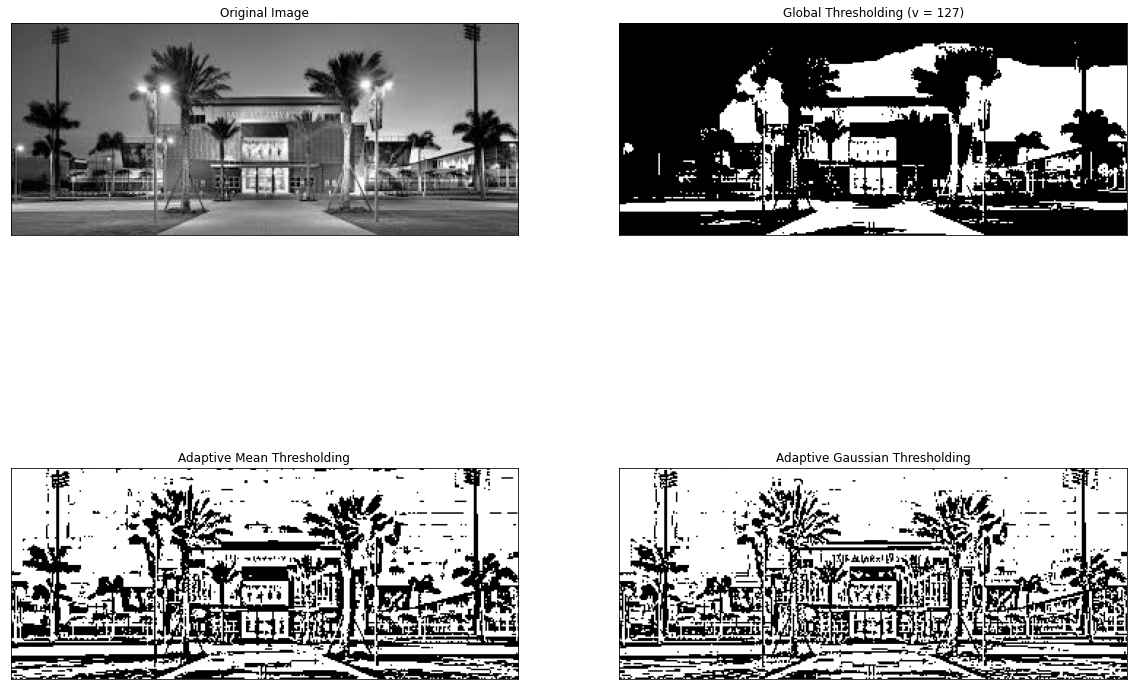

In [62]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]
plt.figure(figsize=(20,15))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# otsu's thresholding

In [96]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [97]:
img = cv2.imread('sIMG_2168.jpg',0) # 2168, 2177, 2180

In [98]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)

ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

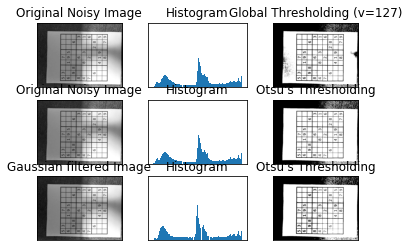

In [99]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Histogram

In [49]:
import cv2
import numpy as np

In [50]:
img=cv2.imread('sIMG_2180.jpg',0) # 2168, 2177, 2180

In [51]:
h, w = img.shape

In [52]:
hist = np.zeros(256, np.uint32)

In [53]:
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [54]:
for i in range(h):
    for j in range(w):
        hist[img[i,j]] += 1

In [55]:
hist

array([   1,   14,   56,  193,  634, 1413, 2266, 2679, 2843, 2986, 3021,
       3298, 3533, 3774, 4029, 4340, 4559, 4751, 5101, 5323, 5401, 5489,
       5337, 5243, 5221, 5095, 4626, 4510, 4127, 3796, 3586, 3319, 3113,
       2980, 2709, 2665, 2628, 2585, 2506, 2510, 2403, 2283, 2193, 2200,
       2230, 2110, 2076, 2151, 2099, 2043, 1951, 1935, 1917, 1986, 1973,
       1879, 1856, 1794, 1906, 1803, 1764, 1744, 1688, 1647, 1737, 1698,
       1688, 1646, 1709, 1594, 1569, 1619, 1630, 1594, 1489, 1587, 1570,
       1549, 1532, 1564, 1545, 1529, 1411, 1504, 1433, 1503, 1454, 1379,
       1403, 1350, 1444, 1510, 1341, 1362, 1371, 1393, 1399, 1384, 1374,
       1342, 1441, 1402, 1324, 1376, 1362, 1344, 1349, 1383, 1390, 1355,
       1391, 1338, 1374, 1408, 1346, 1431, 1504, 1645, 1817, 1909, 2135,
       2446, 2838, 3458, 3570, 3760, 4095, 4499, 4805, 5079, 5123, 5258,
       5278, 5420, 5576, 6033, 6043, 6218, 6119, 6012, 5810, 5829, 5907,
       6159, 6261, 6703, 6635, 6576, 6035, 5678, 53

In [56]:
h,w,ch=256,512,3
histimg=np.zeros((h,w,3),np.uint8)

In [60]:
for i in range(256):
    l = (int)((hist[i]/10000) * 255)
    histimg = cv2.rectangle(histimg, (2*i, h-l), (2*i+2, h-l), (0, 255, 0), 1)

In [61]:
cv2.imshow('image', histimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

###### add noise

In [2]:
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img = cv2.imread('thresh1.png',0)
h, w = img.shape

In [8]:
for i in range((int)(h/2)):
    for j in range((int)(w/2)):
        img[i+int(h/4),j+int(w/4)]=32

In [9]:
noiseImg = np.copy(img)  

m = 64
for i in range(h):
    for j in range(w):
        value = noiseImg[i,j]+random.randint(-m, m)
        if value < 0:
            noiseImg[i,j] = 0
        elif value > 255:
            noiseImg[i,j] = 255
        else :
            noiseImg[i,j] = value

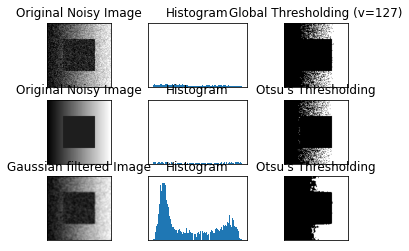

In [11]:

# global thresholding
ret1,th1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(noiseImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noiseImg,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [noiseImg, 0, th1,img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


#  1.4.3

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('sIMG_2164.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

In [15]:
cv2.imshow('image', img)
cv2.imshow('res img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Translation

In [19]:
img = cv2.imread('sIMG_2164.jpg')
rows,cols, _ = img.shape

In [20]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

In [21]:
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotation

In [23]:
img = cv2.imread('sIMG_2164.jpg')

rows, cols, _ = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

In [24]:
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

#  Affine Transformation

In [25]:
img = cv2.imread('sIMG_2164.jpg')

In [26]:
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

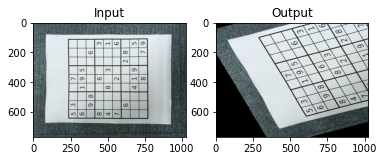

In [27]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#  Perspective Transformation

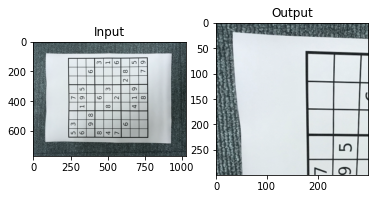

In [28]:
img = cv2.imread('sIMG_2164.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()